In [16]:
import cv2
import numpy as np


class StereoCamera:
    def __init__(self, baseline, focal_len, center_pos):
        # intrinsics
        self.baseline = baseline # in meter
        self.focal_len = focal_len # in pixels
        self.center_pos = center_pos # in pixels, in pixel coordinates

    def transform_keypoints_in_camera_coordinates(self, keypoints_left, keypoints_right, matches):
        '''
        Inverse camera model: Recover the depth from the stereo vision pixels.    

        see: First Principles of Computer Vision - Simple Stereo | Camera Calibration
        https://www.youtube.com/watch?v=hUVyDabn1Mg&t=330s
        '''       
        if matches: # todo
            keypoints_left = [keypoints_left[match.queryIdx] for match in matches]
            keypoints_right = [keypoints_right[match.trainIdx] for match in matches]
        
        b, c_x, c_y, f_x, f_y = self.baseline, *self.center_pos, *self.focal_len # alias
        u_l, v_l = cv2.KeyPoint.convert(keypoints_left).T
        u_r, v_r = cv2.KeyPoint.convert(keypoints_right).T

        print(f'{u_l=}')
        print(f'{u_r=}')
        print(f'{v_l=}')
        print(f'{v_r=}')
        
        d = u_l - u_r # disparity
        x = b * (u_l - c_x) / d
        y = b * f_x/f_y * (v_l - c_y) / d
        z = b * f_x / d
        
        xyz = np.stack([x,y,z], axis=1)
        
        # filter non-horizontal matches
        is_horizontal_alligned = (v_l - v_r < 5)
        xyz = xyz[is_horizontal_alligned]

        return xyz
    

u_l=array([ 569.     ,  565.     ,  996.1246 ,  918.1903 ,  578.4    ,
        933.1201 , 1060.0247 ,  812.     ,  802.80005,  950.53845],
      dtype=float32)
u_r=array([ 559.     ,  555.     ,  960.2927 ,  883.3538 ,  566.4    ,
        897.8689 , 1033.1508 ,  783.     ,  774.00006,  915.70197],
      dtype=float32)
v_l=array([137.     , 140.     , 211.40773, 211.50725,  48.     , 211.50723,
       107.49545, 156.     , 158.40001, 204.04228], dtype=float32)
v_r=array([137.     , 140.     , 211.40773, 211.50725,  48.     , 211.50723,
       107.49545, 156.     , 158.40001, 204.04228], dtype=float32)


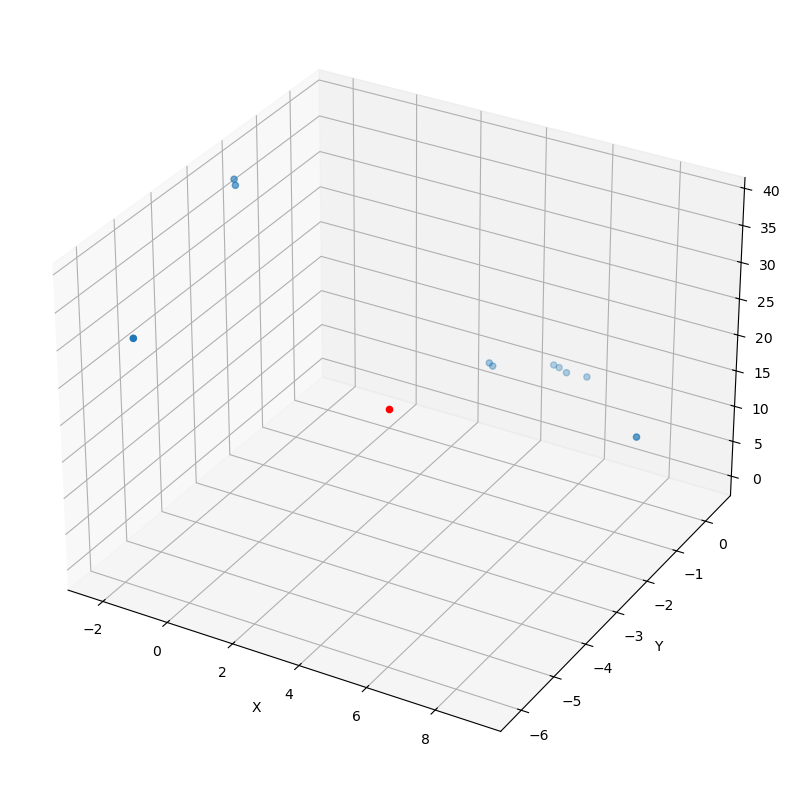

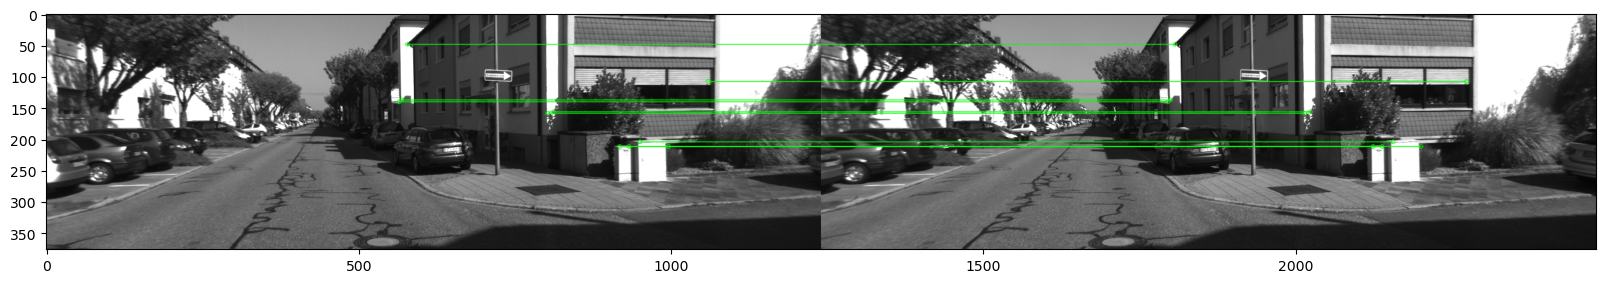

Done!


In [17]:
from matplotlib import pyplot as plt
import os 

# intrinsics
from sensor_setup import sensor_setup
f_u = sensor_setup.T_cam1_to_img1[0,0]
f_v = sensor_setup.T_cam1_to_img1[1,1]
c_u = sensor_setup.T_cam1_to_img1[0,2]
c_v = sensor_setup.T_cam1_to_img1[1,2]
baseline = - 1/f_u * sensor_setup.T_cam1_to_img1[0,3]

camera_model = StereoCamera(baseline, focal_len=(f_u, f_v), center_pos=(c_u, c_v))



img1_path = os.path.join('D:\\DATASETS\\Kitti_SLAM\\dataset\\sequences\\00\\image_0','%06d.png'%100)
img2_path = os.path.join('D:\\DATASETS\\Kitti_SLAM\\dataset\\sequences\\00\\image_1','%06d.png'%100)
img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)

# Initiate detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

xyz = camera_model.transform_keypoints_in_camera_coordinates(kp1, kp2, matches[:10])
x,y,z = np.split(xyz, indices_or_sections=3, axis=1)
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.scatter(x,y,z)
ax.scatter(0,0,0, c='red')
ax.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z')
plt.show()

# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], None, flags=2, matchColor=(0,255,0))
fig = plt.figure(figsize=(20, 10))
plt.imshow(img3)
plt.show()

print('Done!')

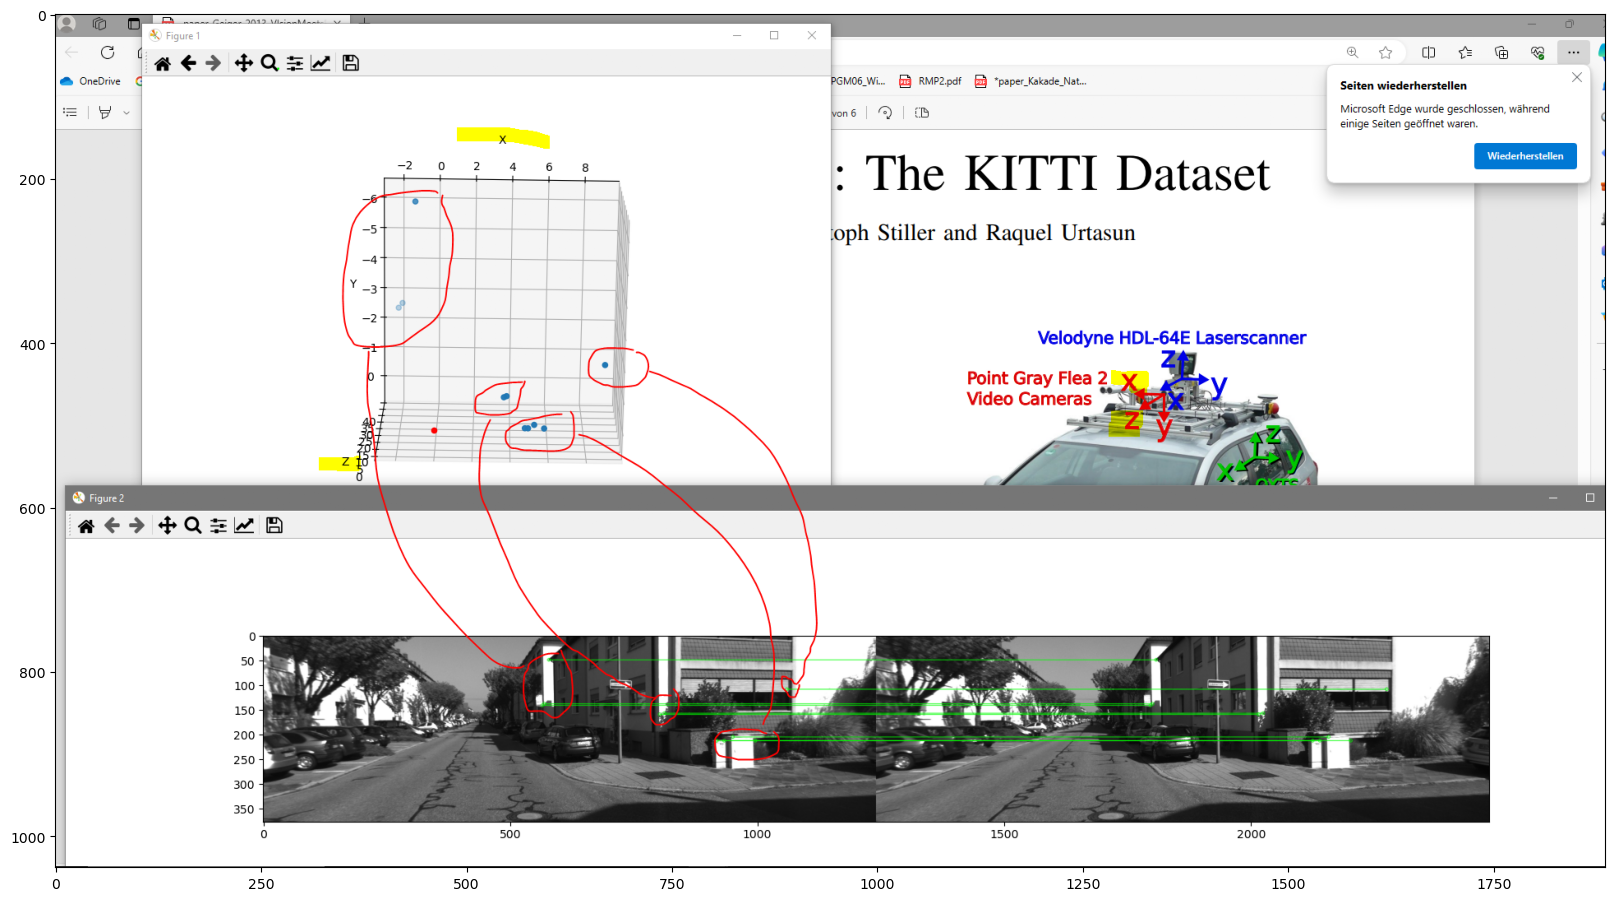

In [7]:
import matplotlib.pyplot as plt
import os
img_proof_of_concept = plt.imread(os.path.join('results', 'proof_of_concept_inverse_cemera_model.PNG'))
fig = plt.figure(figsize=(20,20))
plt.imshow(img_proof_of_concept)

In [30]:
import matplotlib.pyplot as plt
import numpy as np

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, axes = plt.subplots(2,1, subplot_kw=[{'projection': 'polar'}, {}], squeeze=True)
ax = axes[-1]

# fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.set_rmax(1.5)
ax.set_thetamin(160)
ax.set_thetamax(20)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

TypeError: list indices must be integers or slices, not str

<Figure size 640x480 with 0 Axes>

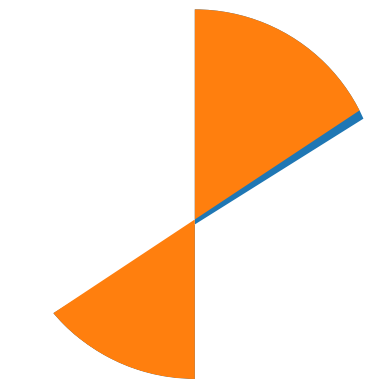

In [8]:
import matplotlib.pyplot as plt
import math

Fig, ax = plt.subplots(subplot_kw=dict(polar=True))
ax.bar(math.pi/3.0, 5.0, width=math.pi/3.0)
ax.bar(math.pi/3.0, 3.0, width=math.pi/3.0)

# Adjust the axis
ax.set_ylim(math.pi/3.0, 2*math.pi/3.0)

ax.set_frame_on(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.show()